#STAT 201 Project Proposal

##Introduction

There has been considerable debate regarding the effects of prominent alcohol use on academic/educational performance, such as GPA and academic average. While it is quite challenging to create a direct causal link between the two variables, those within academics have attempted to obtain metrics ultimately related to academic performance. Research from the American Economist Journal has suggested that drinking in high school positively correlates with absenteeism rates (Austin, 2012). Furthermore, regarding the relationship between absenteeism and academic performance, findings presented by the American Educational Research Association indicate that "overall absences are negatively associated with academic achievement" (Klein et al., 2022). Taking these previously denoted findings into account, our group has set out to answer the following research question: does the level of secondary school alcohol consumption affect the amount of school absenteeism? To conduct this research, we will utilize a dataset from Kaggle that examines students' academic and socioeconomic attributes across two Portuguese secondary schools ("https://raw.githubusercontent.com/riddhibattu/STAT201/main/Maths.csv"). The data set includes the following information that will be utilized in our research (Chauhan, 2022): 
- Student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
- Workday alcohol consumption (Dalc)
- Weekend alcohol consumption (Walc)
- Number of school absences (absences)



In this case, the level of workday alcohol consumption and weekend alcohol consumption, scaled from 1-5 (from 1 - very low to 5 - very high), will serve as our response variable, and the number of school absences will subsequently serve as our explanatory variable. We will use the mean of our response variable as the parameter and standard deviation as the scale parameter. Considering that the data at hand only measures these variables across two schools in Portugal, in addition to the requirements of the assignment, our group will conduct a bootstrap sampling distribution using the data to generate a sampling distribution to mimic the population distribution of all schools in Portugal. Finally, hypothesis testing will be conducted to answer the aforementioned research question. Our null hypothesis is that there is no relationship between alcohol consumption among secondary school students and the rate of school absences. In contrast to this, our alternative hypothesis, as suggested by findings from the American Economist Journal (Austin, 2012), is that increased alcohol consumption among secondary school students will result in increased school absences. 

##Preliminary Results

We can read the dataset into R using Libraries and read_csv. Then, we clean the data by choosing the columns we are interested in and filtering out any NA rows. We also change column Dalc to workday_ac and colume Walc to weekend_ac to clarify the data. For this project, we only take into consideration of alcohol assumption that is greater than 2 since we assume the moderate and above amount of alcohol consumption would cause a difference. Therefore, we filter out any workday alcohol consumption and weekend alcohol consunption that are equal or lower than 2.

In [1]:
library(cowplot)
library(datateachr)
library(digest)
library(infer)
library(repr)
library(tidyverse)
library(dplyr)

alcohol_data <- read_csv("https://raw.githubusercontent.com/riddhibattu/STAT201/main/Maths.csv") 

head(alcohol_data)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Rows: 395 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (17): school, sex, address, famsize, Pstatus, Mjob, Fjob, reason, guardi...
dbl (16): age, Medu, Fedu, traveltime, studytime, failures, famrel, freetime...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10
GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,2,15,14,15
GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,4,6,10,10
GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,10,15,15,15


In [2]:
#choosing the columes we will be working with and drop empty rows
alcohol_data <- alcohol_data %>%
mutate(workday_ac = Dalc) %>%
mutate(weekend_ac = Walc) %>%
select('workday_ac', 'weekend_ac', 'absences') %>%
drop_na() %>%
filter(workday_ac >2) %>%
filter(weekend_ac >2) 

head(alcohol_data)

workday_ac,weekend_ac,absences
<dbl>,<dbl>,<dbl>
5,5,16
3,4,0
3,4,6
4,4,6
5,5,6
5,5,4


After cleaning the data, we calculated the mean workday absents and mean weekend absents for alcohol consumption greater than 2. 

We then plotted the workday alcohol consumption level versus the number of absences and the weekend alcohol consumption level versus the number of absences separately. The purpose of the plots is to roughly look at the two plots to see if they are similar or different in their means. The two plots below show that the graph looks similar for workday alcohol consumption and weekday alcohol consumption. The two means also indicate that the absence related to workday alcohol consumption is similar to the absence related to weekend alcohol consumption.

In [3]:
#mean workday absents with alcohol consumption greater than 2
mean_workday_absents <- alcohol_data %>%
summarize(mean=mean(absences)) %>%
pull(mean)
mean_workday_absents

[1] 8.02381

In [4]:
#mean weekend absents with alcohol consumption greater than 2
mean_weekend_absents <- alcohol_data %>%
summarize(mean=mean(absences)) %>%
pull(mean)
mean_weekend_absents

[1] 8.02381

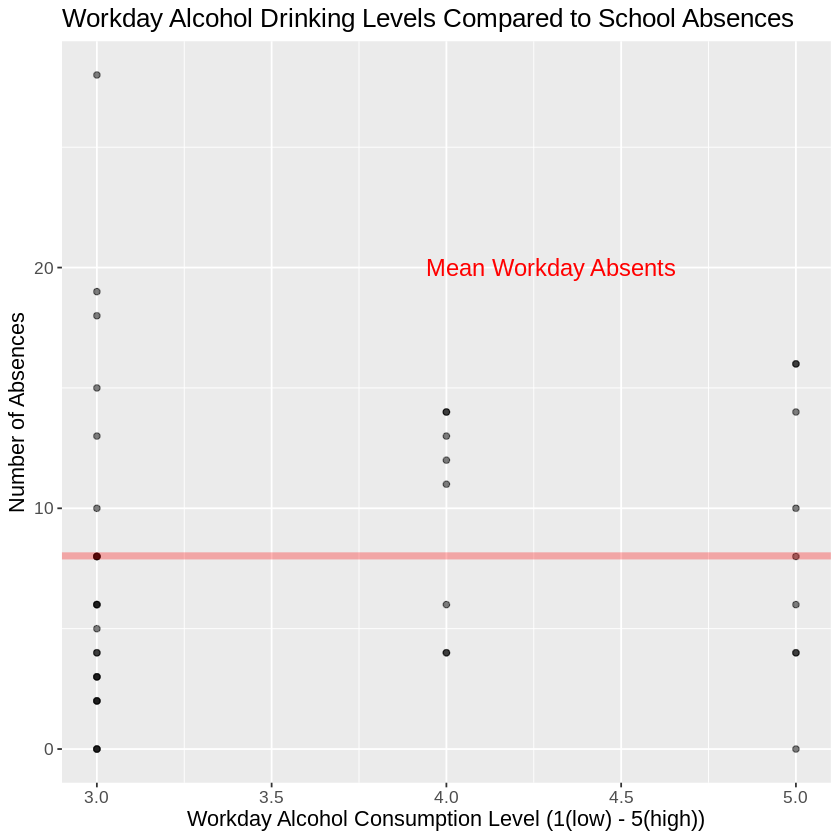

In [5]:
#workday scatterplot
workday_scatterplot <- alcohol_data %>%
    ggplot(aes(x = workday_ac, y = absences)) +
    geom_point(alpha = 0.5) +
    geom_hline(yintercept = mean_workday_absents, color = "red", alpha=.3, lwd=2) + 
    theme(text = element_text(size = 100)) +
    labs(title = "Workday Alcohol Drinking Levels Compared to School Absences", 
         x = "Workday Alcohol Consumption Level (3(moderate) - 5(high))",
         y = "Number of Absences") +
    theme(text = element_text(size = 13)) +
    annotate("text",x = 4.3, y = 20, label = "Mean Workday Absents", color="red", size=5)
workday_scatterplot

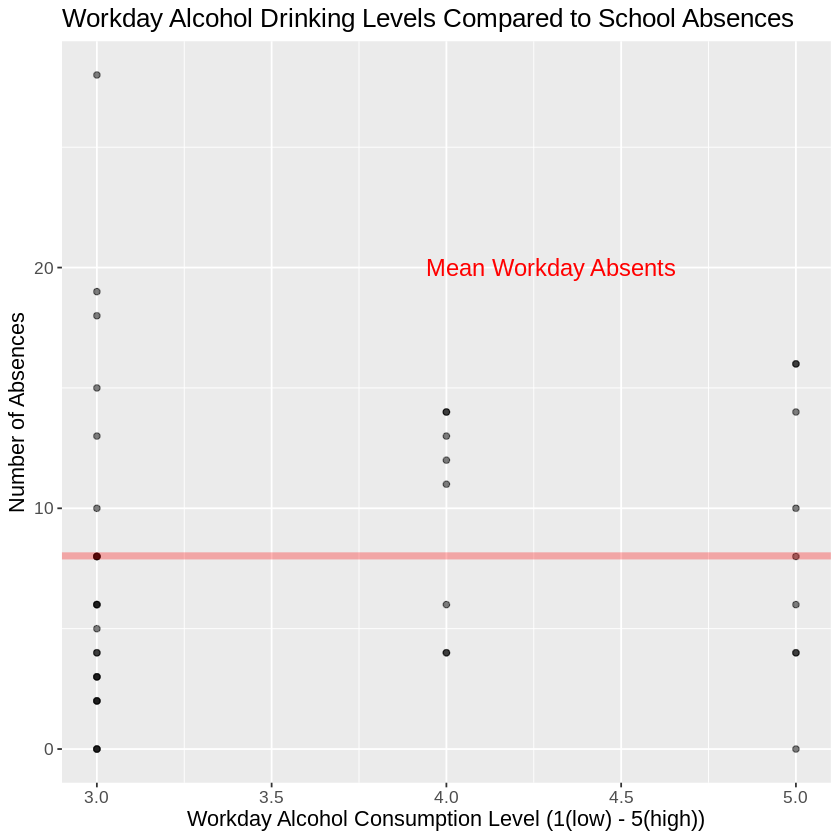

In [6]:
#weekend scatterplot
weekend_scatterplot <- alcohol_data %>%
    ggplot(aes(x = weekend_ac, y = absences)) +
    geom_point(alpha = 0.5) +
    geom_hline(yintercept = mean_weekend_absents, color = "red", alpha=.3, lwd=2) + 
    theme(text = element_text(size = 100)) +
    labs(title = "Weekend Alcohol Drinking Levels Compared to School Absences", 
         x = "Weekend Alcohol Consumption Level (3(moderate) - 5(high))",
         y = "Number of Absences") +
    theme(text = element_text(size = 13)) +
    annotate("text",x = 4.3, y = 20, label = "Mean Weekend Absents", color="red", size=5)
workday_scatterplot

##Methods

We are using the dataset from UCI Machine Learning Repository, a trustworthy source for datasets. Therefore, the dataset is complete, valid, and reliable for our project. 

The plots above indicate that our null hypothesis could be true if the mean absence due to workday alcohol consumption is equal to the mean absence due to weekend alcohol consumption. However, to decide whether we can reject or fail to reject our hypothesis, we need to do a hypothesis test with the bootstrap method and asymptotic approach to verify.

We will use both bootstrap methods to resample for the null distribution: the absence of students who consume minimum alcohol. Then, we will use an asymptotic approach to calculate the 95% confidence interval for the mean. We can use an asymptotic approach because the size of our data is large enough, the samples are taken independently, and the estimator used is random.

In this project, we expect to use the hypothesis test to find if there is a correlation between alcohol consumption and student attendance. The purpose of this project is to help students to find out if there is such a correlation. If yes, students can refer to the result for a better work-life balance plan. In the future, we can test if there is a correlation between student attendance and academic success to investigate further the correlation between drinking and students’ academic performance.


#Reference

Austin, W. A. (2012). THE EFFECTS OF ALCOHOL USE ON HIGH SCHOOL ABSENTEEISM. 
    American Economist, 57(2), 238-252. 
    Retrieved from https://www.proquest.com/scholarly-journals/effects-alcohol-use-on-high-school-absenteeism/docview/1113789486/se-2

Chauhan, A. (2022, September 15). Alcohol effects on study. Kaggle. 
    Retrieved November 4, 2022, from https://www.kaggle.com/datasets/whenamancodes/alcohol-effects-on-study 

Klein, M., Sosu, E. M., & Dare, S. (2022). School Absenteeism and Academic Achievement: Does the Reason for Absence Matter? 
    AERA Open, 8. https://doi.org/10.1177/23328584211071115

